# Google Play Stores Apps - Dataset

![alt text](https://www.oficinadanet.com.br/imagens/post/28192/750xNx50fefb40-47f0-414c-9c7b-e56786ba4a4c.png.pagespeed.ic.090d968867.png)

### Analyst: 

### Nilton Thiago de Andrade Coura 

Brazil - Recife/Pernambuco

  * contact: niltontac@gmail.com

  * https://github.com/niltontac

  * https://www.linkedin.com/in/niltontac/

# Análise Exploratória dos Dados

**Importando bibliotecas** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Carregando dataset**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/niltontac/EspAnalise-EngDados/master/data/googleplaystore.csv')

In [3]:
# Visualizano uma amostra do dataset
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Checando total de dados faltantes
total_missing = data.isnull().sum().sort_values(ascending=False)
percentual_missing = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
data_missing = pd.concat([total_missing, percentual_missing], axis=1, keys=['Total', 'Percent'])
data_missing = data_missing[data_missing["Total"]>0]
data_missing

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


In [6]:
# Extraindo atributos do dataset original e criando uma cópia apenas com os atributos que farão parte da análise
data_df = data.iloc[:, 1:10]
data_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


## Dataset processing and handling

###Rating attribute

In [7]:
# Verificando os valores do atributo
data_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [8]:
# Dados estatísticos incluíndo um resumo de tendência central, dispersão e distribuição do dataset, excluíndo valores faltantes se houver
data_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# Valores faltantes
data_df['Rating'].isnull().sum()

1474

**Existem alguns valores nulos. Vamos preencher o atributo 'Rating' aplicando a média calculada de seus valores:**



In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_df.iloc[:,1:2] = imputer.fit_transform(data_df.iloc[:,1:2])

In [11]:
data_df['Rating'].isnull().sum()

0

**Como verificamos acima, o atributo 'Rating' foi preenchido com a média de todos os seus valores, através de função 'SimpleImputer'.**

Text(0.5, 1.0, 'Rating distribution')

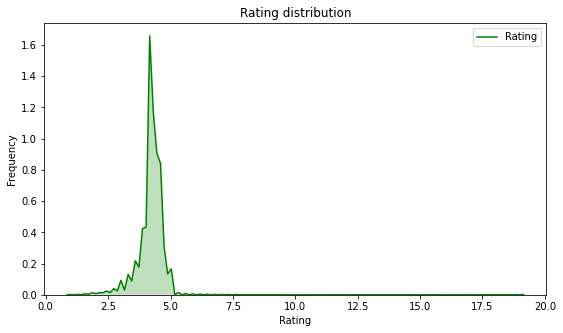

In [12]:
# Distribuição dos valores de 'Rating'
plt.subplots(figsize=(9,5))
fig = sns.kdeplot(data_df.Rating, color='green', shade=True)
fig.set_xlabel('Rating')
fig.set_ylabel('Frequency')
plt.title('Rating distribution')

###Type attribute:

In [13]:
# Verificando os valores do atributo
data_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [14]:
# Verificando a contagem de cada valor, inclusive os nulos
print(data_df['Type'].value_counts(dropna=False))

Free    10039
Paid      800
0           1
NaN         1
Name: Type, dtype: int64


In [15]:
data_df.loc[data['Type'].isnull()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9148,FAMILY,4.193338,0,Varies with device,0,NaN,0,Everyone 10+,Strategy


**Como sabemos, o atributo descreve se o app é do Tipo 'Paid' ou 'Free'. Existe uma instância desse atributo que está nula, mas como ele tem relação direta com o atributo 'Price', no qual seu valor é '0', então podemos setar o vamor dessa instância nula de 'Type' com o valor='Free':**

In [16]:
data_df['Type'] = data_df['Type'].fillna('Free')

**Agora vamos excluir a linha '0', onde classifico como "lixo" desse atributo:**

In [17]:
data_df = data_df.drop(data_df[(data_df['Type'] == '0')].index)

In [18]:
data_df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [19]:
print(data_df['Type'].value_counts(dropna=False))

Free    10040
Paid      800
Name: Type, dtype: int64


**Após o tratamento, agora temos apenas os valores de 'Free' e 'Paid'. Agora vou converter esses valores para binários:**

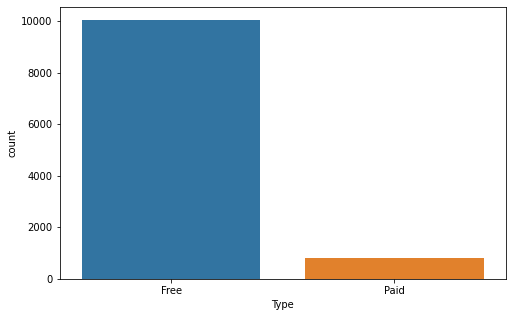

In [20]:
# Type distribution
plt.figure(figsize=(8,5))
fig = sns.countplot(x=data_df['Type'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)
plt.show(fig)

In [21]:
column = 'Type'
pie = data_df[column].value_counts().reset_index()
pie = pie.rename(columns = {column: 'count', 'index': column})
trace = go.Pie(labels=pie[column], values=pie['count'], pull=[0.05, 0])
layout = {'title': 'Distribuição Free vs Paid (%)'}
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [22]:
# Convertendo para binário
def type_bin(tp):
  if tp == 'Free':
    return 0
  else:
    return 1

data_df['Type'] = data_df['Type'].map(type_bin)
print(data_df['Type'].value_counts())

0    10040
1      800
Name: Type, dtype: int64


**Agora vou excluir o restante dos valores dos dados faltantes, pois considero irrelevantes e não irão influenciar nos resultados:**

In [23]:
data_df.dropna(how='any', inplace=True)

In [24]:
data_df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

### Price attribute:

In [25]:
data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**Não faz sentido esse atributo ser do tipo object se ela tem valores númericos se tratando de preço. Vou remover o símbolo '$' e convertê-lo de object para float:**

In [26]:
data_df['Price'] = data_df['Price'].apply(lambda x:str(x).replace('$', '') if '$' in x else x)
data_df['Price'] = data_df['Price'].apply(lambda x:float(x))

In [27]:
data_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [28]:
data_df['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

###Size attribute:

In [29]:
data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Seguindo no atributo 'Size' a mesma ideia do atributo anterior, que é tranformar de object para float e remover onde houver os símbolos 'M' ou 'k'. Também temos a afirmação 'Varies with device' que terá de ser tratado:**

In [30]:
# Verificando a quantidade de instâncias com 'Varies with device'
len(data_df[data_df.Size == 'Varies with device'])

1695

In [31]:
# Aplicando NaN para cada instância de 'Varies with device'
data_df['Size'].replace('Varies with device', np.nan, inplace=True)

In [32]:
data_df.Size = (data_df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data_df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [33]:
# Preenchendo os valores de 'Varies with device' que foram setados como NaN, com a média dos valores de do atributo 'Category'
data_df['Size'].fillna(data_df.groupby('Category')['Size'].transform('mean'), inplace=True)

In [34]:
data_df['Size'].unique()

array([1.90000000e+07, 1.40000000e+07, 8.70000000e+06, 2.50000000e+07,
       2.80000000e+06, 5.60000000e+06, 2.90000000e+07, 3.30000000e+07,
       3.10000000e+06, 2.80000000e+07, 1.20000000e+07, 2.00000000e+07,
       2.10000000e+07, 3.70000000e+07, 2.70000000e+06, 5.50000000e+06,
       1.70000000e+07, 3.90000000e+07, 3.10000000e+07, 4.20000000e+06,
       7.00000000e+06, 2.30000000e+07, 6.00000000e+06, 6.10000000e+06,
       4.60000000e+06, 9.20000000e+06, 5.20000000e+06, 1.10000000e+07,
       2.40000000e+07, 1.23709677e+07, 9.40000000e+06, 1.50000000e+07,
       1.00000000e+07, 1.20000000e+06, 2.60000000e+07, 8.00000000e+06,
       7.90000000e+06, 5.60000000e+07, 5.70000000e+07, 2.00226811e+07,
       3.50000000e+07, 5.40000000e+07, 2.01000000e+02, 3.60000000e+06,
       5.70000000e+06, 8.60000000e+06, 2.40000000e+06, 2.70000000e+07,
       2.50000000e+06, 1.60000000e+07, 3.40000000e+06, 8.90000000e+06,
       3.90000000e+06, 2.90000000e+06, 3.80000000e+07, 3.20000000e+07,
      

In [35]:
data_df['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

###Installs attribute:

In [36]:
data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

**Removendo os símbolos '+' e ',' e convertendo de object para int:**

In [37]:
data_df.Installs = data_df.Installs.apply(lambda x: x.replace(',',''))
data_df.Installs = data_df.Installs.apply(lambda x: x.replace('+',''))
data_df.Installs = data_df.Installs.apply(lambda x: int(x))

In [38]:
data_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [39]:
data_df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

###Reviews attribute:

In [40]:
data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [41]:
# Convertendo de object para int
data_df['Reviews'] = data_df['Reviews'].apply(lambda x:int(x))
data_df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

###Category attribute:

In [42]:
data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

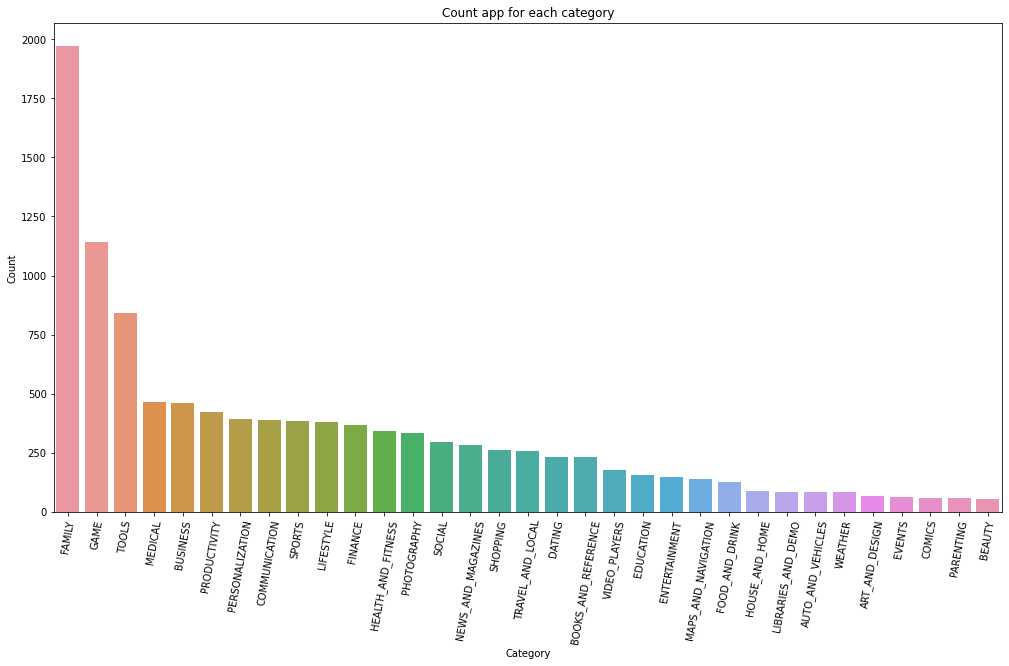

In [43]:
# Plotando quantidade de aplicativos por categoria
plt.subplots(figsize=(17,9))
sns.barplot(x=data_df['Category'].value_counts().index,y=data_df['Category'].value_counts().values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count app for each category')
plt.xticks(rotation=80)
plt.show()

**Vamos transformar os dados do atributo "Category" para dados categóricos, e depois transformar cada valor referente a uma categoria em um código único transformando para int:**

In [44]:
data_df['Category'] = data_df.Category.astype('category')
print(data_df['Category'])

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10840, dtype: category
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., TOOLS,
                          TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WEATHER]


In [45]:
data_df['Category'] = data_df['Category'].cat.codes
data_df['Category']

0         0
1         0
2         0
3         0
4         0
         ..
10836    11
10837    11
10838    20
10839     3
10840    18
Name: Category, Length: 10840, dtype: int8

### Content Rating attribute:

In [46]:
data_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**Seguindo o mesmo plano, vamos converter os dados do atributo "Content Rating" para dados categóricos, e depois transformar cada valor referente a uma categoria em um código único transformando também para int:**

In [47]:
data_df['Content Rating'] = data_df['Content Rating'].astype('category')
print(data_df['Content Rating'])

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10840, dtype: category
Categories (6, object): [Adults only 18+, Everyone, Everyone 10+, Mature 17+, Teen, Unrated]


In [48]:
data_df['Content Rating'] = data_df['Content Rating'].cat.codes
data_df['Content Rating']

0        1
1        1
2        1
3        4
4        1
        ..
10836    1
10837    1
10838    1
10839    3
10840    1
Name: Content Rating, Length: 10840, dtype: int8

### Genres attribute:

In [49]:
data_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

**Seguindo ainda o mesmo tratamento de conversão. Agora para o atributo "Genres":**

In [50]:
data_df['Genres'] = data_df.Genres.astype('category')
print(data_df['Genres'])

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10840, dtype: category
Categories (119, object): [Action, Action;Action & Adventure, Adventure,
                           Adventure;Action & Adventure, ..., Video Players & Editors;Creativity,
                           Video Players & Editors;Music & Video, Weather, Word]


In [51]:
data_df['Genres'] = data_df['Genres'].cat.codes
data_df['Genres']

0         9
1        12
2         9
3         9
4        11
         ..
10836    39
10837    39
10838    71
10839    19
10840    67
Name: Genres, Length: 10840, dtype: int8

###Correlação entre os atributos após tratamento e processamento dos dados

**Depois de converter os atributos object para float ou int, vamos ver suas correlações:**

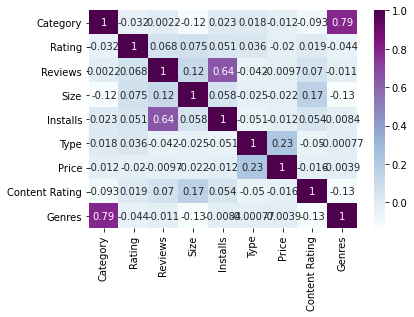

In [52]:
sns.heatmap(data_df.corr(), annot=True, cmap='BuPu')

**Observamos que há um forte correlação positiva entre os atributos "Installs" e "Reviews". Vamos visualizar e analisar as características dessa correlação:**

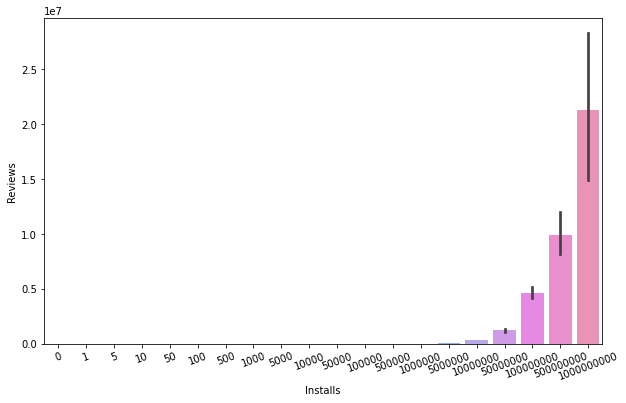

In [53]:
# Plotando Installs vs Reviews
plt.subplots(figsize=(10,6))
plt.xticks(rotation=20)
sns.barplot('Installs', 'Reviews', data=data_df)
plt.show()

**Dessa correlação entre "Installs" e "Reviews", observamos que quando há mais instalações de aplicativos há também mais avaliações sobre eles.**

## Normalizando os dados

In [54]:
data_features = data_df
data_features.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000000.0,10000,0,0.0,1,9
1,0,3.9,967,14000000.0,500000,0,0.0,1,12
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9
4,0,4.3,967,2800000.0,100000,0,0.0,1,11


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit(data_features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [58]:
normalized_data = scaler.transform(data_features)

In [59]:
normalized_data_df = pd.DataFrame(normalized_data)
normalized_data_df.columns = data_features.columns
normalized_data_df.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10840.000000,10840.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000
mean,0.522668,0.797993,5.682734e-03,0.211946,0.015464,0.073801,0.002568,0.293007,0.544611
std,0.261041,0.119727,3.745937e-02,0.210684,0.085029,0.261458,0.039874,0.201230,0.276667
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343750,0.775000,4.861927e-07,0.059000,0.000001,0.000000,0.000000,0.200000,0.322034
50%,0.437500,0.800000,2.679178e-05,0.144600,0.000100,0.000000,0.000000,0.200000,0.567797
75%,0.781250,0.875000,7.008276e-04,0.280000,0.005000,0.000000,0.000000,0.200000,0.813559
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
normalized_data_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.0,0.775,0.000002,0.190,0.00001,0.0,0.0,0.2,0.076271
1,0.0,0.725,0.000012,0.140,0.00050,0.0,0.0,0.2,0.101695
2,0.0,0.925,0.001120,0.087,0.00500,0.0,0.0,0.2,0.076271
3,0.0,0.875,0.002759,0.250,0.05000,0.0,0.0,0.8,0.076271
4,0.0,0.825,0.000012,0.028,0.00010,0.0,0.0,0.2,0.093220


**Antes de aplicar os modelos de clusters, vamos reduzir a dimensionalidade dos dados através de PCA:**


In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [63]:
data_df_pca = pca.fit_transform(normalized_data)

# Applying Clustering Models



In [64]:
from sklearn.metrics import davies_bouldin_score as db

##K-Means


In [65]:
from sklearn.cluster import KMeans

In [66]:
# Cálculo do wcss
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_df_pca)
  wcss.append(kmeans.inertia_)

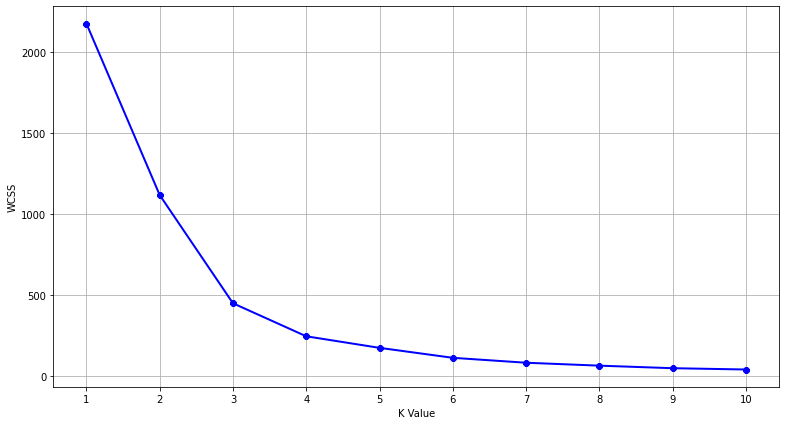

In [67]:
# Plotando o método Elbow (gráfico do "cotovelo")
plt.figure(figsize=(13,7))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='blue', marker='8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11, 1))
plt.ylabel('WCSS')
plt.show()

**Observando o gráfico do cotovelo acima, me parece honesto definir o número 5 para usarmos para quantidade de clusters do KMeans:**

In [68]:
# Aplicando o kmeans com 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeans_labels = kmeans.labels_
kmeans.labels_

array([1, 1, 1, ..., 3, 1, 3], dtype=int32)

In [70]:
# Centroide de cada cluster
kmeans.cluster_centers_ 

array([[-0.43829895, -0.08173108],
       [ 0.40638961, -0.06602975],
       [ 0.33588768,  0.93194901],
       [-0.01705165, -0.07421291],
       [-0.27475654,  0.91908431]])

In [71]:
data_df['KMeans'] = kmeans_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1
...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1


In [72]:
data_df['KMeans'].value_counts()

1    3567
3    3357
0    3116
4     485
2     315
Name: KMeans, dtype: int64

In [73]:
# Resultado das métricas definidas
db(data_features, kmeans.labels_)

6.514619673772356

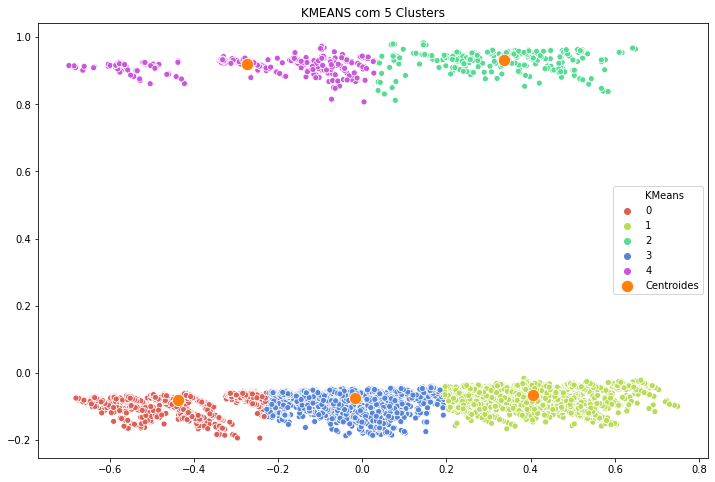

In [74]:
# KMEANS com 5 clusters
data_df['KMeans'] = kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMeans'], 
                palette=sns.color_palette('hls', 5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, label='Centroides')
plt.title('KMEANS com 5 Clusters')
plt.show()

In [75]:
# Dados estatísticos
data_df['KMeans'].describe()

count    10840.000000
mean         1.495203
std          1.308765
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          4.000000
Name: KMeans, dtype: float64

##Kmedoids

In [76]:
!pip install scikit-learn-extra

In [77]:
from sklearn_extra.cluster import KMedoids

In [78]:
# Cálculo do wcss
wcss = []
for k in range(1, 11):
  kmedoids = KMedoids(n_clusters=k)
  kmedoids.fit(data_df_pca)
  wcss.append(kmedoids.inertia_)

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).



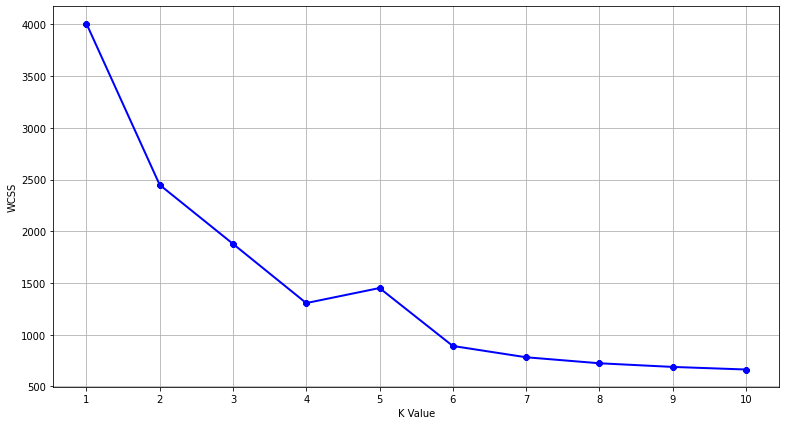

In [79]:
# Plotando o método Elbow (gráfico do "cotovelo")
plt.figure(figsize=(13,7))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='blue', marker='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**Observando o gráfico do cotovelo acima, me parece honesto definir o número de 4 clusters para o KMedoids:**

In [80]:
# Aplicando o kmedoids com 4 clusters e métrica de manhattan
kmedoids = KMedoids(metric='manhattan', n_clusters=4)
kmedoids.fit(data_df_pca)

KMedoids(init='heuristic', max_iter=300, metric='manhattan', n_clusters=4,
         random_state=None)

In [81]:
kmedoids_labels = kmedoids.labels_
kmedoids.labels_

array([3, 3, 3, ..., 1, 3, 0])

In [82]:
# Centroide de cada cluster
kmedoids.cluster_centers_

array([[ 0.0169054 , -0.06213794],
       [-0.25494356, -0.06622836],
       [-0.54816505, -0.07619362],
       [ 0.39179249, -0.05132556]])

In [83]:
kmedoids.medoid_indices_

array([ 7266, 10029,  3333,   470])

In [84]:
data_df['KMedoids'] = kmedoids_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans,KMedoids
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1,3
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1,3
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1,3
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1,3
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1,3
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1,3
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3,1
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1,3


In [85]:
data_df['KMedoids'].value_counts()

3    3755
0    2913
2    2098
1    2074
Name: KMedoids, dtype: int64

In [86]:
# Resultado das métricas definidas
db(data_features, kmedoids.labels_)

7.565040372916988

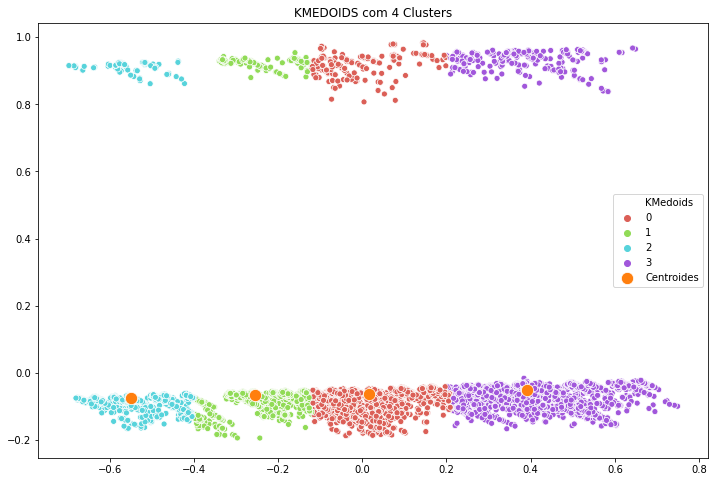

In [87]:
# KMEDOIDS com 4 clusters
data_df['KMedoids'] = kmedoids.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMedoids'], 
                palette=sns.color_palette('hls', 4))
sns.scatterplot(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=150, label='Centroides')
plt.title('KMEDOIDS com 4 Clusters')
plt.show()

In [88]:
# Dados estatísticos
data_df['KMedoids'].describe()

count    10840.000000
mean         1.617620
std          1.211016
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: KMedoids, dtype: float64

###DBSCAN

In [89]:
from sklearn.cluster import DBSCAN

**O DBSCAN tem características diferentes de definição das métricas de clusters em relação ao KMeans e KMedoids. 
Nesse caso, usaremos as definições do DBSCAN com eps = 0.3, min_sample=12 e métrica de manhattan:**

In [90]:
dbscan = DBSCAN(eps=0.3, min_samples=12, metric='manhattan')
dbscan.fit(data_df_pca)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='manhattan',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [91]:
dbscan_labels = dbscan.labels_
dbscan_labels

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
data_df['DBSCAN'] = dbscan_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans,KMedoids,DBSCAN
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1,3,0
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1,3,0
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1,3,0
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1,3,0
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1,3,0
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1,3,0
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3,1,0
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1,3,0


In [93]:
data_df['DBSCAN'].value_counts()

0    10040
1      800
Name: DBSCAN, dtype: int64

In [94]:
# Resultado das métricas definidas
db(data_features, dbscan.labels_)

3.0443773132284844

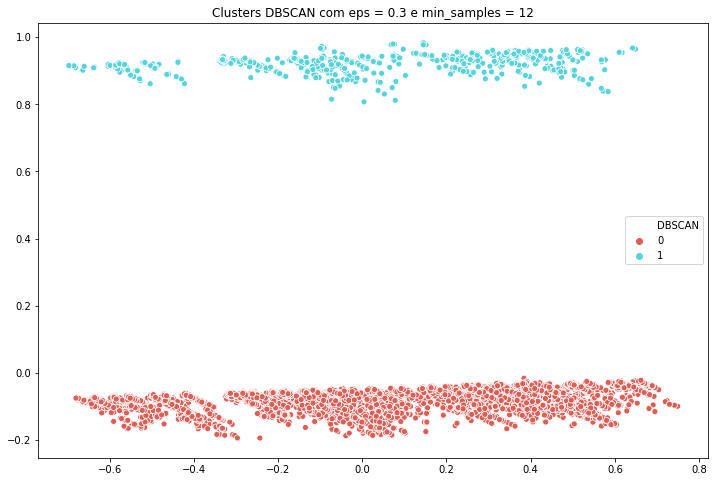

In [95]:
# DBSCAN com eps = 0.3 e min_samples = 12
data_df['DBSCAN'] = dbscan.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['DBSCAN'], 
                palette=sns.color_palette('hls', np.unique(dbscan.labels_).shape[0]))
plt.title('Clusters DBSCAN com eps = 0.3 e min_samples = 12')
plt.show()

In [96]:
# Dados estatísticos
data_df['DBSCAN'].describe()

count    10840.000000
mean         0.073801
std          0.261458
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DBSCAN, dtype: float64

## Reaplicando os clusters com método de previsão

###KMeans:

In [97]:
# Cálculo do wcss
wcss = []
for k in range(1,11):
  kmeans_predict = KMeans(n_clusters=k)
  kmeans_predict.fit_predict(data_df_pca)
  wcss.append(kmeans_predict.inertia_)

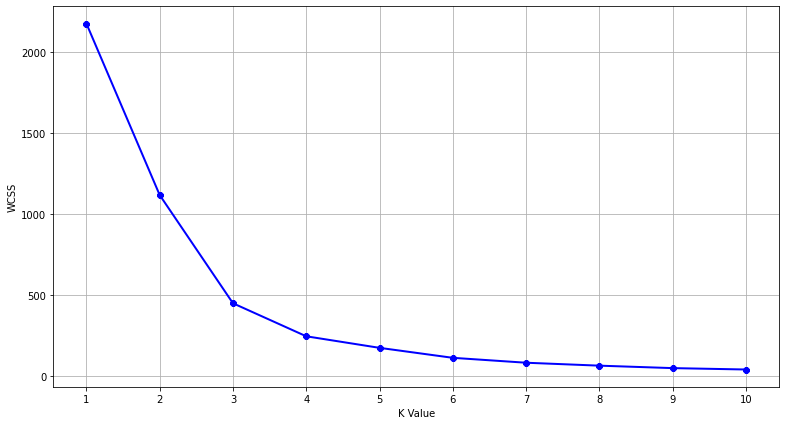

In [98]:
# Plotando o método Elbow (gráfico do "cotovelo")
plt.figure(figsize=(13,7))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='blue', marker='8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11, 1))
plt.ylabel('WCSS')
plt.show()

**Definindo as métricas para previsão como as mesmas métricas definidas ao conjunto original para comparação dos resultados posteriormente:**

In [99]:
# Aplicando o kmeans de previsão com 5 clusters
kmeans_predict = KMeans(n_clusters=5)
y_kmeans = kmeans_predict.fit_predict(data_df_pca)

In [100]:
kmeans_predict_labels = kmeans_predict.labels_
kmeans_predict.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [101]:
data_df['KMeans_Predict'] = kmeans_predict_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans,KMedoids,DBSCAN,KMeans_Predict
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1,3,0,1
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1,3,0,1
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1,3,0,1
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1,3,0,1
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1,3,0,1
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1,3,0,1
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3,1,0,0
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1,3,0,1


In [102]:
data_df['KMeans_Predict'].value_counts()

1    3567
0    3357
3    3116
2     485
4     315
Name: KMeans_Predict, dtype: int64

In [103]:
# Resultado das métricas definidas
db(data_features, kmeans_predict.labels_)

6.514619673771667

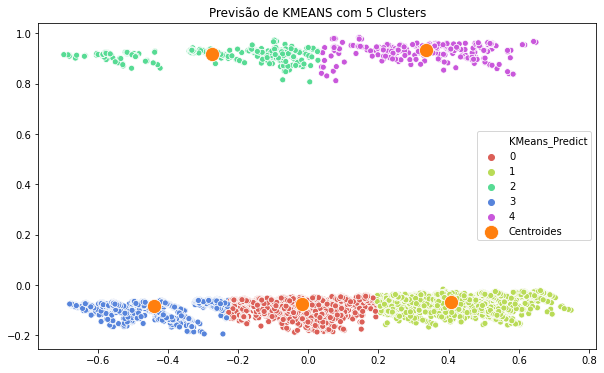

In [104]:
# Previsão de KMEANS com 5 Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMeans_Predict'], 
                palette=sns.color_palette('hls', 5))
sns.scatterplot(kmeans_predict.cluster_centers_[:, 0], kmeans_predict.cluster_centers_[:, 1], s=200, label='Centroides')
plt.title('Previsão de KMEANS com 5 Clusters')
plt.show()

In [105]:
# Dados estatísticos
data_df['KMeans_Predict'].describe()

count    10840.000000
mean         1.397140
std          1.268149
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          4.000000
Name: KMeans_Predict, dtype: float64

###KMedoids:

In [106]:
# Cálculo do wcss
wcss = []
for k in range(1, 11):
  kmedoids_predict = KMedoids(n_clusters=k)
  kmedoids_predict.fit_predict(data_df_pca)
  wcss.append(kmedoids_predict.inertia_)

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning:

Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).



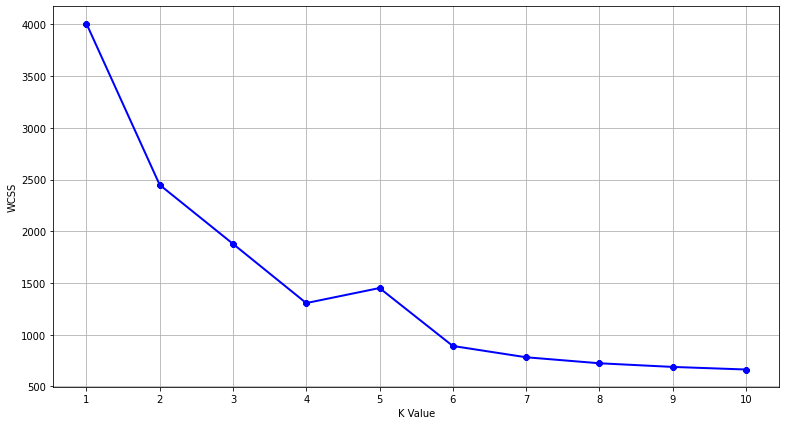

In [107]:
# Plotando o método Elbow (gráfico do "cotovelo")
plt.figure(figsize=(13,7))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='blue', marker='8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11, 1))
plt.ylabel('WCSS')
plt.show()

**Definindo as métricas para previsão como as mesmas métricas definidas ao conjunto original para comparação dos resultados posteriormente:**

In [108]:
# Aplicando o kmedoids de previsão com 4 clusters e métrica de manhattan
kmedoids_predict = KMedoids(metric='manhattan', n_clusters=4)
kmedoids_predict.fit(data_df_pca)

KMedoids(init='heuristic', max_iter=300, metric='manhattan', n_clusters=4,
         random_state=None)

In [109]:
kmedoids_predict_labels = kmedoids_predict.labels_
kmedoids_predict.labels_

array([3, 3, 3, ..., 1, 3, 0])

In [110]:
# Centroide de cada cluster
kmedoids_predict.cluster_centers_

array([[ 0.0169054 , -0.06213794],
       [-0.25494356, -0.06622836],
       [-0.54816505, -0.07619362],
       [ 0.39179249, -0.05132556]])

In [111]:
kmedoids_predict.medoid_indices_

array([ 7266, 10029,  3333,   470])

In [112]:
data_df['KMedoids_Predict'] = kmedoids_predict_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans,KMedoids,DBSCAN,KMeans_Predict,KMedoids_Predict
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1,3,0,1,3
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1,3,0,1,3
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1,3,0,1,3
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1,3,0,1,3
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1,3,0,1,3
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1,3,0,1,3
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3,1,0,0,1
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1,3,0,1,3


In [113]:
data_df['KMedoids_Predict'].value_counts()

3    3755
0    2913
2    2098
1    2074
Name: KMedoids_Predict, dtype: int64

In [114]:
# Resultado das métricas definidas
db(data_features, kmedoids_predict.labels_)

7.565040372916815

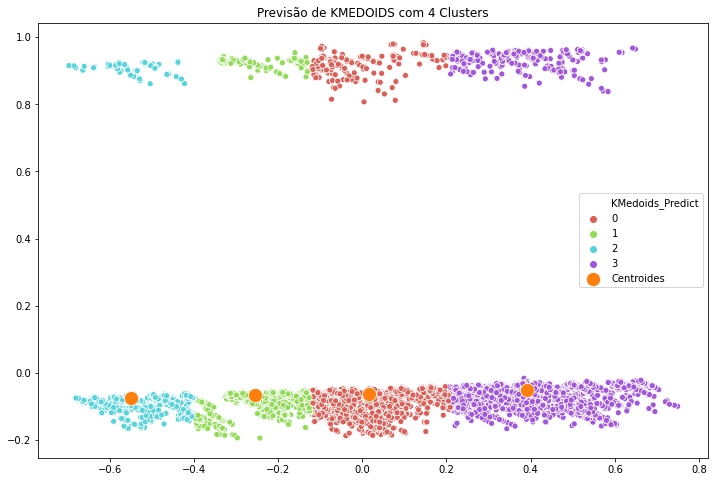

In [115]:
# Previsão de KMEDOIDS com 5 Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMedoids_Predict'], 
                palette=sns.color_palette('hls', 4))
sns.scatterplot(kmedoids_predict.cluster_centers_[:, 0], kmedoids_predict.cluster_centers_[:, 1], s=200, label='Centroides')
plt.title('Previsão de KMEDOIDS com 4 Clusters')
plt.show()

In [116]:
# Dados estatísticos
data_df['KMedoids_Predict'].describe()

count    10840.000000
mean         1.617620
std          1.211016
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: KMedoids_Predict, dtype: float64

###DBSCAN:

**Definindo as métricas para previsão como as mesmas métricas definidas ao conjunto original para comparação dos resultados posteriormente:**

In [117]:
# DBSCAN de previsão com eps = 0.3, min_sample = 12 e métrica manhattan
dbscan_predict = DBSCAN(eps=0.3, min_samples=12, metric='manhattan')
dbscan_predict.fit_predict(data_df_pca)

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
dbscan_predict_labels = dbscan_predict.labels_
dbscan_predict_labels

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
data_df['DBSCAN_Predict'] = dbscan_predict_labels
data_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,KMeans,KMedoids,DBSCAN,KMeans_Predict,KMedoids_Predict,DBSCAN_Predict
0,0,4.100000,159,1.900000e+07,10000,0,0.0,1,9,1,3,0,1,3,0
1,0,3.900000,967,1.400000e+07,500000,0,0.0,1,12,1,3,0,1,3,0
2,0,4.700000,87510,8.700000e+06,5000000,0,0.0,1,9,1,3,0,1,3,0
3,0,4.500000,215644,2.500000e+07,50000000,0,0.0,4,9,1,3,0,1,3,0
4,0,4.300000,967,2.800000e+06,100000,0,0.0,1,11,1,3,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,11,4.500000,38,5.300000e+07,5000,0,0.0,1,39,1,3,0,1,3,0
10837,11,5.000000,4,3.600000e+06,100,0,0.0,1,39,1,3,0,1,3,0
10838,20,4.193338,3,9.500000e+06,1000,0,0.0,1,71,3,1,0,0,1,0
10839,3,4.500000,114,1.328378e+07,1000,0,0.0,3,19,1,3,0,1,3,0


In [120]:
data_df['DBSCAN_Predict'].value_counts()

0    10040
1      800
Name: DBSCAN_Predict, dtype: int64

In [121]:
# Resultado das métricas definidas
db(data_features, dbscan_predict.labels_)

3.044377313228484

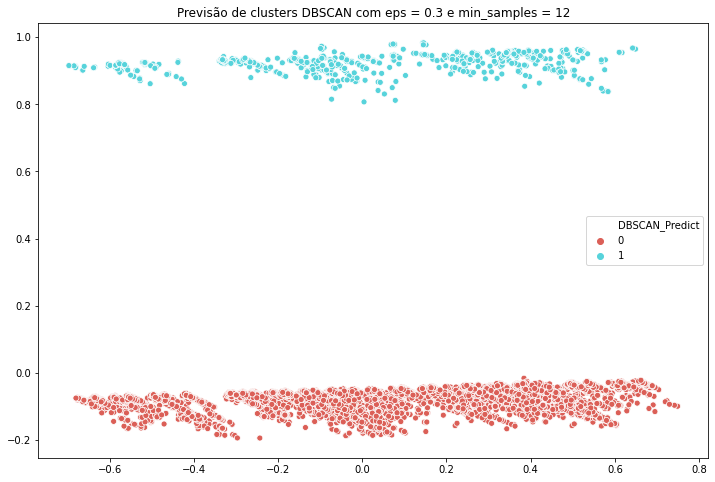

In [122]:
# Previsão de DBSCAN com eps = 0.3 e min_samples = 12
plt.figure(figsize=(12, 8))
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['DBSCAN_Predict'], 
                palette=sns.color_palette('hls', np.unique(dbscan_predict.labels_).shape[0]))
plt.title('Previsão de clusters DBSCAN com eps = 0.3 e min_samples = 12')
plt.show()

In [123]:
# Dados estatísticos
data_df['DBSCAN_Predict'].describe()

count    10840.000000
mean         0.073801
std          0.261458
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DBSCAN_Predict, dtype: float64

## Comparação dos Clusters: Original vs Previsão

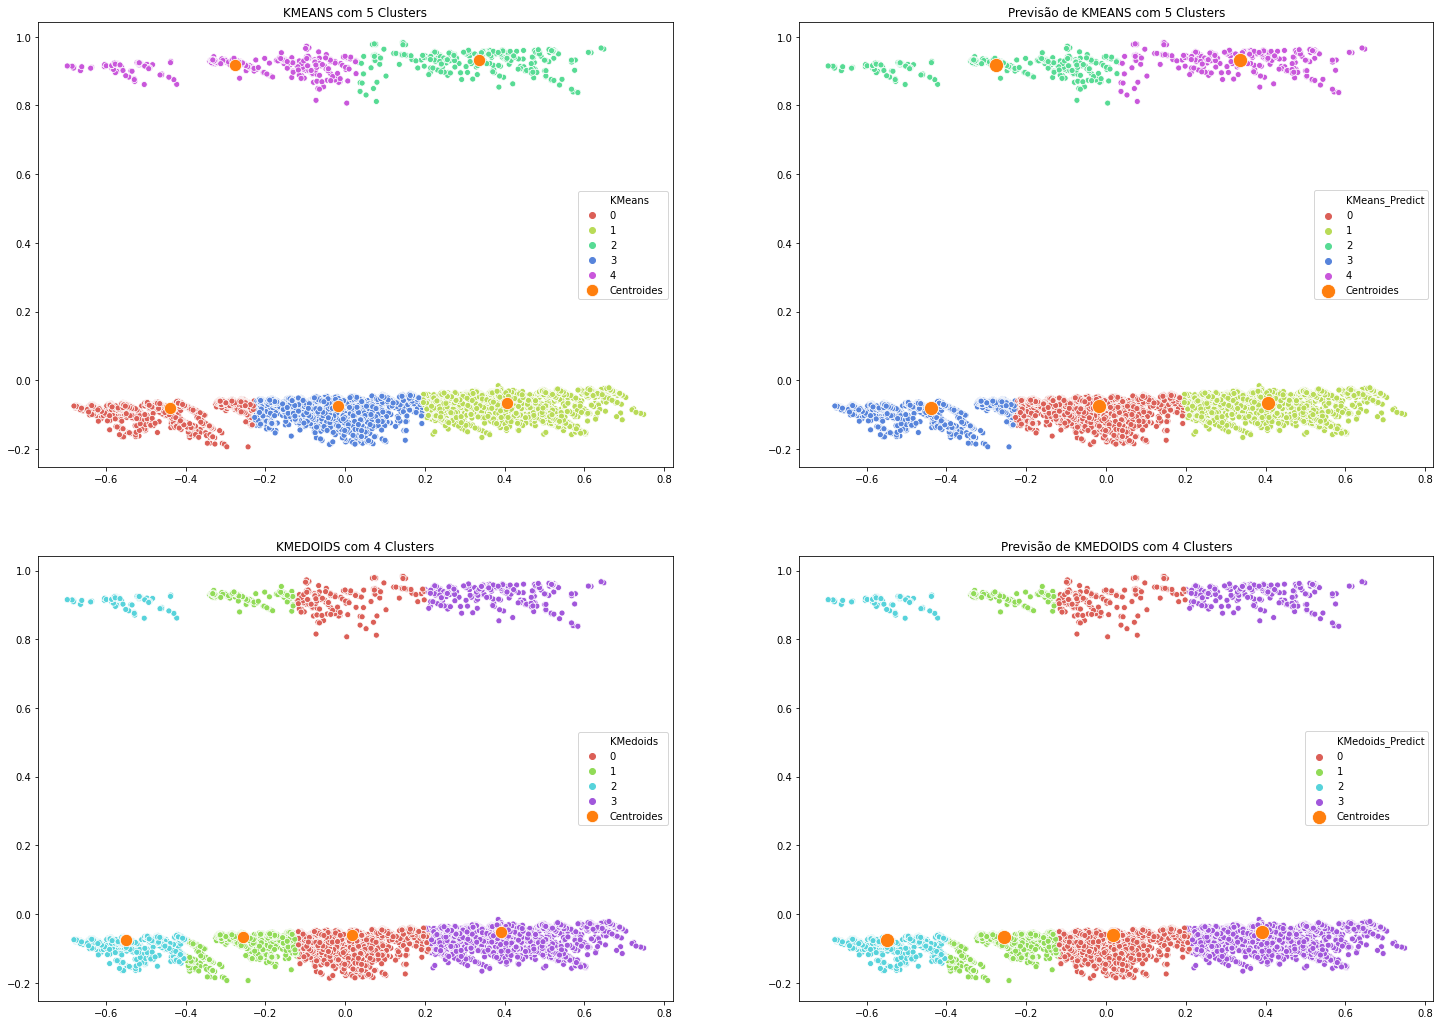

In [124]:
fig = plt.figure(figsize=(25, 18))


# KMEANS com 5 clusters
ax = fig.add_subplot(221)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMeans'], 
                palette=sns.color_palette('hls', 5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, label='Centroides', ax=ax)
ax.set_title('KMEANS com 5 Clusters')


# Previsão de KMEANS com 5 Clusters
ax = fig.add_subplot(222)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMeans_Predict'], 
                palette=sns.color_palette('hls', 5))
sns.scatterplot(kmeans_predict.cluster_centers_[:, 0], kmeans_predict.cluster_centers_[:, 1], s=200, label='Centroides', ax=ax)
ax.set_title('Previsão de KMEANS com 5 Clusters')


# KMEDOIDS com 4 clusters
ax = fig.add_subplot(223)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMedoids'], 
                palette=sns.color_palette('hls', 4))
sns.scatterplot(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=150, label='Centroides', ax=ax)
ax.set_title('KMEDOIDS com 4 Clusters')


# Previsão de KMEDOIDS com 4 Clusters
ax = fig.add_subplot(224)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['KMedoids_Predict'], 
                palette=sns.color_palette('hls', 4))
sns.scatterplot(kmedoids_predict.cluster_centers_[:, 0], kmedoids_predict.cluster_centers_[:, 1], s=200, label='Centroides', ax=ax)
ax.set_title('Previsão de KMEDOIDS com 4 Clusters');

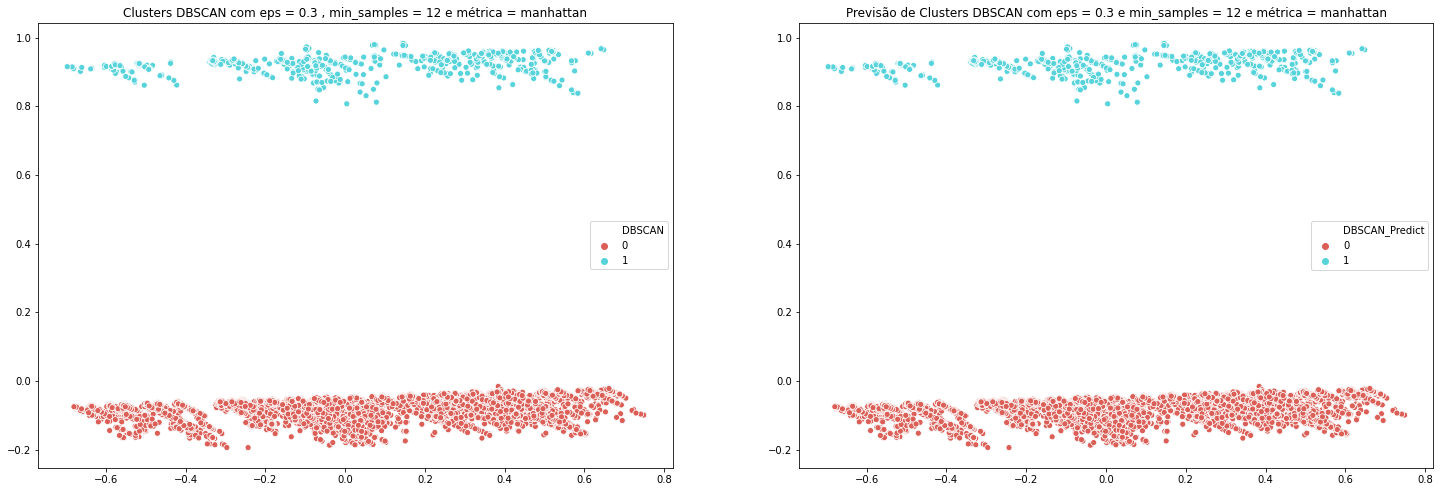

In [125]:
fig = plt.figure(figsize=(25, 18))

# DBSCAN com eps = 0.3 , min_samples = 12 e métrica = manhattan
ax = fig.add_subplot(221)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['DBSCAN'], 
                palette=sns.color_palette('hls', np.unique(dbscan.labels_).shape[0]))
ax.set_title('Clusters DBSCAN com eps = 0.3 , min_samples = 12 e métrica = manhattan')


# Previsão de DBSCAN com eps = 0.3 e min_samples = 12 e métrica = manhattan
ax = fig.add_subplot(222)
sns.scatterplot(data_df_pca[:, 0], data_df_pca[:, 1], hue=data_df['DBSCAN_Predict'], 
                palette=sns.color_palette('hls', np.unique(dbscan_predict.labels_).shape[0]))
ax.set_title('Previsão de Clusters DBSCAN com eps = 0.3 e min_samples = 12 e métrica = manhattan');

## Conclusão:

**Em comparativos paralelos entre os próprios modelos, ou seja, entre eles mesmos, os grupos de clusters previstos tiveram uma semalhança muito forte tanto nos resultados dos métodos utilizados, quanto nos dados estatísticos descritivos. O que me faz crer que existe uma ótima consistência entre os grupos dos dados originais e os dados previstos.**

**Em relação a qual o melhor modelo aplicado para este conjunto de dados, creio que as diferenças entre eles não são tão relevantes para este dataset. Mas aponto o modelo DBSCAN como o melhor modelo aplicado. Nesse caso a comparação em relação aos resultados dos db's de cada modelo foi determinante, no qual DBSCAN está mais próximo de 0(zero) que os demais modelos.**